In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
import math

% matplotlib inline

## Polynomial fit with Chi-square vs order of fit

In [2]:
#complex data
N = 20  # number of points
K = 10  #order-K of polynomial
points = np.sort(np.random.rand(N)*10-5)  #-5~5 range
coeffs = np.random.rand(K)*2-1  #-1~1  coefficents
fx = np.array([sum([c*p**i for i,c in enumerate(coeffs)]) for p in points])  #f(x) signal
noise = np.var(fx)*0.01  #noise of measure
ys = fx + np.random.randn(N)*noise  #signal


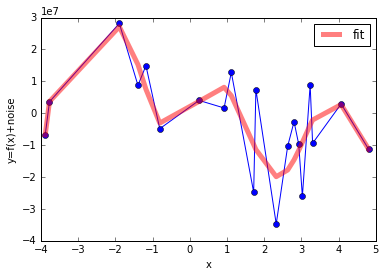

In [3]:
#plotting
plt.plot(points,ys,'-o')
plt.xlabel('x')
plt.ylabel('y=f(x)+noise')

##poly-fitting
p = numpy.polyfit(points, ys, K)
plt.plot(points,np.polyval(p, points),'r',linewidth=5,alpha=0.5,label='fit')
plt.legend()

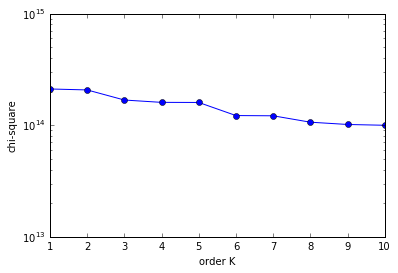

In [4]:
#chi-square measure
chis = []
for ks in range(1,11):
    p, residuals, _, _, _ = np.polyfit(points, ys, ks, full=True)
    chisq_dof = residuals[0] / (len(points) - 3)
    chis.append(chisq_dof)
    
plt.semilogy(np.arange(1,K+1),chis,'-o')
plt.xlabel('order K')
plt.ylabel('chi-square')

## Minimum energy per data point

In [5]:
#energy scaling
rep = 30  #repeat instantiation
N = 30  #more points
K = 10  #order-K of polynomial
minE = []
for rr in range(0,rep):  #repeat instantiation
    points = np.sort(np.random.rand(N)*10-5)  #-5~5 range
    coeffs = np.random.rand(K)*2-1  #-1~1  coefficents
    fx = np.array([sum([c*p**i for i,c in enumerate(coeffs)]) for p in points])  #f(x) signal
    noise = np.var(fx)*0.01  #noise of measure
    ys = fx + np.random.randn(N)*noise  #signal
    chis = []
    for ks in range(1,K+1):
        p, residuals, _, _, _ = np.polyfit(points, ys, ks, full=True)
        chisq_dof = residuals[0] / (len(points) - 3)
        chis.append(chisq_dof)
    minE.append(np.array(chis)/N)

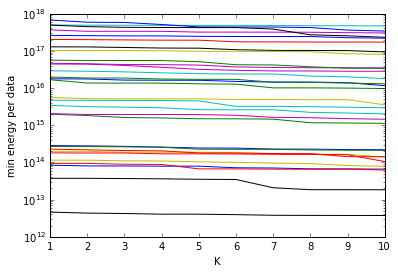

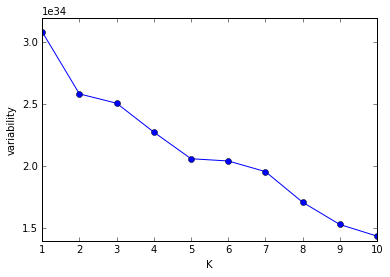

In [6]:
plt.semilogy(np.arange(1,K+1),np.array(minE).T);
plt.xlabel('K')
plt.ylabel('min energy per data')

plt.figure()
plt.plot(np.arange(1,K+1),np.var(np.array(minE),axis=0),'-o')
plt.xlabel('K')
plt.ylabel('variability')

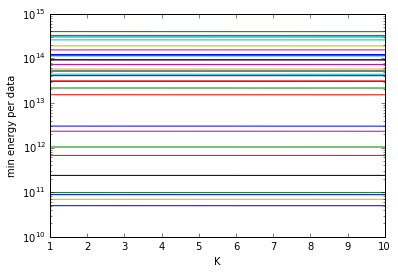

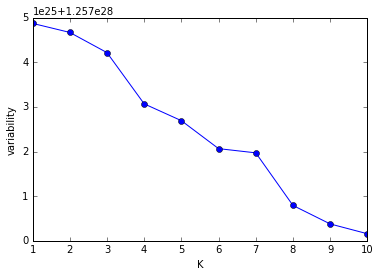

In [7]:
#energy scaling
rep = 30  #repeat instantiation
N = 5000  #even more points
K = 10  #order-K of polynomial
minE = []
for rr in range(0,rep):  #repeat instantiation
    points = np.sort(np.random.rand(N)*10-5)  #-5~5 range
    coeffs = np.random.rand(K)*2-1  #-1~1  coefficents
    fx = np.array([sum([c*p**i for i,c in enumerate(coeffs)]) for p in points])  #f(x) signal
    noise = np.var(fx)*0.01  #noise of measure
    ys = fx + np.random.randn(N)*noise  #signal
    chis = []
    for ks in range(1,K+1):
        p, residuals, _, _, _ = np.polyfit(points, ys, ks, full=True)
        chisq_dof = residuals[0] / (len(points) - 3)
        chis.append(chisq_dof)
    minE.append(np.array(chis)/N)
    
plt.semilogy(np.arange(1,K+1),np.array(minE).T);
plt.xlabel('K')
plt.ylabel('min energy per data')

plt.figure()
plt.plot(np.arange(1,K+1),np.var(np.array(minE),axis=0),'-o')
plt.xlabel('K')
plt.ylabel('variability')

## Nontrivial optimum K order

In [45]:
Ns = 10**np.arange(0,5,0.2)  #number of samples
K = 10  #order K
rep = 10  #number of instantiation examples
record = []
for nn in Ns:
    chimin = []
    N = math.ceil(nn)
    for rr in range(0,rep):
        points = np.sort(np.random.rand(N)*10-5)  #-5~5 range
        coeffs = np.random.rand(K)*2-1  #-1~1  coefficents
        fx = np.array([sum([c*p**i for i,c in enumerate(coeffs)]) for p in points])  #f(x) signal
        noise = np.var(fx)*0.01  #noise of measure
        ys = fx + np.random.randn(N)*noise  #signal
        chis = []
        for ks in range(1,K+1):
            p, residuals, _, _, _ = np.polyfit(points, ys, ks, full=True)
            #chisq_dof = residuals[0] / (len(points) - 3)
            pred = np.polyval(p, points)
            chis_cal = np.sum((ys-pred)**2)/np.var(pred) + ks*np.log(N)  #optimal K with panelty on complexity
            chis.append(chis_cal)
        chimin.append(np.argmin(chis)+1)  #find optimal K
    record.append(chimin)

/Users/Macintosh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/Users/Macintosh/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in double_scalars


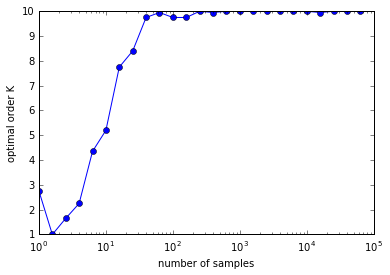

In [46]:
plt.semilogx(Ns,np.mean(np.array(record),axis=1),'-o');
plt.xlabel('number of samples')
plt.ylabel('optimal order K')